###  Reading data -  < altered_g4data_1.csv >

In [1]:
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd

In [13]:
df = pd.read_csv('C://Users//Administrator//Documents//code//data//DTP_D4//altered_g4data_1.csv', na_filter=False, encoding = 'utf-8')

In [41]:
#df

### adding columns to df ( for car ages ) ,  and make a new csv

In [7]:
def splitting_columns_produced_Y(df_row):
    
    if df_row[5] =='' :
        df_row[5] = "000000"
    
    year = str(df_row[5]).split('.')[0][:4]
    return year

In [15]:
df['car_produced_year'] = df.apply(splitting_columns_produced_Y, axis = 1)

In [10]:
def splitting_columns_produced_M(df_row):
    
    if df_row[5] =='' :
        df_row[5] = "000000"
    
    month = str(df_row[5]).split('.')[0][4] + str(df_row[5]).split('.')[0][5]
    return month

In [17]:
try :
    df['car_produced_month'] = df.apply(splitting_columns_produced_M, axis = 1)
except :
    print('probably NULL encoding error')

In [24]:
def calculate_ages_by_month(df_row):
    
    if df_row['car_produced_year'] == 'NULL' and df_row['car_produced_month'] == 'NULL' :
        #print(df_row)
        return 0
    elif df_row['car_produced_month'] == '' :
        ages_by_month = (2018 - float(df_row[4]) )
        return ages_by_month
    
    elif df_row['car_produced_year'] == '0000' and df_row['car_produced_month'] == '00' :
        return 0
    elif df_row['car_produced_month'] == '00' :
        ages_by_month = (2018 - float(df_row['car_produced_year']) )
        return ages_by_month
    
    else :
         
        ages_by_month = ((2018 - float(df_row['car_produced_year']) )*12 - float(df_row['car_produced_month']) + 3)//12
        return ages_by_month 
    

In [25]:
df['ages_by_month'] = df.apply(calculate_ages_by_month, axis = 1)

In [27]:
def calculate_rest_month(df_row):
    
    if df_row['car_produced_year'] == 'NULL' and df_row['car_produced_month'] == 'NULL' :
        #print(df_row)
        return 0
    elif df_row['car_produced_month'] == '' :
        rest_month = (2018 - float(df_row['car_produced_year']) )//12
        return rest_month
    
    elif df_row['car_produced_year'] == '0000' and df_row['car_produced_month'] == '00' :
        return 0
    elif df_row['car_produced_month'] == '00' :
        rest_month = (2018 - float(df_row['car_produced_year']) )//12
        return rest_month
    
        
    else :
        rest_month = ((2018 - float(df_row['car_produced_year']) )*12 - float(df_row['car_produced_month']) + 3) % 12
        return rest_month 

In [28]:
df['rest_month'] = df.apply(calculate_rest_month, axis = 1)

In [30]:
def calculate_total_month(df_row):
    
    if df_row['car_produced_year'] == 'NULL' and df_row['car_produced_month'] == 'NULL' :
        #print(df_row)
        return 0
    elif df_row['car_produced_month'] == '' :
        total_month = (2018 - float(df_row['car_produced_year']) )*12 + 3
        return total_month
    
    elif df_row['car_produced_year'] == '0000' and df_row['car_produced_month'] == '00' :
        return 0
    elif df_row['car_produced_month'] == '00' :
        total_month = (2018 - float(df_row['car_produced_year']) )*12 + 3
        return total_month
        
    else :
        total_month = ((2018 - float(df_row['car_produced_year']) )*12 - float(df_row['car_produced_month']) + 3)
        return total_month

In [31]:
df['total_month'] = df.apply(calculate_total_month, axis = 1)

####  to_csv()

In [33]:
columns = ['VEHICLE_ID', 'DetectedCarCategory', 'IdentityType', 'CarBrand', 'RegisteredCarCategory' , 'CarFactorized_YM', 'OwnerGender', 'CarCounty', 'TotalKM2017', 'TotalDay2017', 'AverageDistance', 'DelayedPayBillTimes', 'WeekdayRatio', 'WeekendRatio', 'NorthRatio', 'MidRatio', 'SouthRatio', 'DayPassingRatio', 'NightPassingRatio', 'AverageSpeed', 'OverSpeedRatio', 'bigger350KM', 'ACL_days', 'CarBrand_Ultimate', 'car_produced_year', 'car_produced_month', 'ages_by_month', 'rest_month', 'total_month']
df.to_csv('C://Users//Administrator//Documents//code//data//DTP_D4//data_5000_with_ages.csv',columns = columns , index=False , header = True,sep=',',encoding='utf-8')

### insert into mySQL

In [35]:
import peewee
import pymysql

db = peewee.MySQLDatabase('db_test',
                          user='root',
                          host='localhost',
                          password='root5438',
                          port=3306)

In [36]:
class data_5000_wth_ages(peewee.Model):
    VEHICLE_ID = peewee.IntegerField()
    DetectedCarCategory = peewee.CharField()
    IdentityType= peewee.CharField()
    CarBrand = peewee.CharField()
    RegisteredCarCategory = peewee.CharField()
    CarFactorized_YM = peewee.CharField()
    OwnerGender = peewee.TextField()
    CarCounty = peewee.TextField()
    TotalKM2017 = peewee.FloatField()
    TotalDay2017 = peewee.FloatField()
    AverageDistance = peewee.FloatField()
    DelayedPayBillTimes = peewee.FloatField()
    WeekdayRatio = peewee.FloatField()
    WeekendRatio = peewee.FloatField()
    NorthRatio = peewee.FloatField()
    MidRatio = peewee.FloatField()
    SouthRatio = peewee.FloatField()
    DayPassingRatio = peewee.FloatField()
    NightPassingRatio = peewee.FloatField()
    AverageSpeed = peewee.FloatField()
    OverSpeedRatio = peewee.FloatField()
    bigger350KM = peewee.FloatField()
    ACL_days = peewee.FloatField()
    CarBrand_Ultimate = peewee.CharField()
    car_produced_year = peewee.FloatField()
    car_produced_month = peewee.FloatField()
    ages_by_month = peewee.FloatField()
    rest_month = peewee.FloatField()
    total_month = peewee.FloatField()
    
    class Meta:
        database = db

In [40]:
table_dict = ({'VEHICLE_ID': value_lists[i][0],
               'DetectedCarCategory': value_lists[i][1],
               'IdentityType': value_lists[i][2],
               'CarBrand': value_lists[i][3],
               'RegisteredCarCategory': value_lists[i][4],
               'CarFactorized_YM': value_lists[i][5],
               'OwnerGender': value_lists[i][6],
               'CarCounty': value_lists[i][7],
               'TotalKM2017': value_lists[i][8],
               'TotalDay2017': value_lists[i][9],
               'AverageDistance': value_lists[i][10],
               'DelayedPayBillTimes': value_lists[i][11],
               'WeekdayRatio': value_lists[i][12],
               'WeekendRatio': value_lists[i][13],
               'NorthRatio': value_lists[i][14],
               'MidRatio': value_lists[i][15],
               'SouthRatio': value_lists[i][16],
               'DayPassingRatio': value_lists[i][17],
               'NightPassingRatio': value_lists[i][18],
               'AverageSpeed': value_lists[i][19],
               'OverSpeedRatio': value_lists[i][20],
               'bigger350KM': value_lists[i][21],
               'ACL_days': value_lists[i][22],
               'CarBrand_Ultimate': value_lists[i][23],
               'car_produced_year' : value_lists[i][24],
               'car_produced_month': value_lists[i][25],
               'ages_by_month' : value_lists[i][26],
               'rest_month' : value_lists[i][27],
               'total_month' : value_lists[i][28]
               
              } for i in range(len(value_lists)))

with db.atomic():
    data_5000_wth_ages.insert_many(table_dict).execute()

In [37]:
df_nn = pd.read_csv('C://Users//Administrator//Documents//code//data//DTP_D4//data_5000_with_ages.csv', na_filter=True, encoding = 'utf-8')

In [38]:
rows = []
for i in df_nn.iterrows() :
    one_row = list(i)
    listed_row = list(one_row[1])
    
    rows.append(listed_row)

In [39]:
value_lists = rows 

### cluster

In [43]:
df = pd.read_csv('C://Users//Administrator//Documents//code//data//DTP_D4//data_5000_with_ages.csv', na_filter=True, encoding = 'utf-8')

In [58]:
#df

In [49]:
cordf = df.corr()

In [51]:
columns = ['VEHICLE_ID', 'DetectedCarCategory', 'IdentityType', 'CarBrand', 'RegisteredCarCategory' , 'CarFactorized_YM', 'OwnerGender', 'CarCounty', 'TotalKM2017', 'TotalDay2017', 'AverageDistance', 'DelayedPayBillTimes', 'WeekdayRatio', 'WeekendRatio', 'NorthRatio', 'MidRatio', 'SouthRatio', 'DayPassingRatio', 'NightPassingRatio', 'AverageSpeed', 'OverSpeedRatio', 'bigger350KM', 'ACL_days', 'CarBrand_Ultimate', 'car_produced_year', 'car_produced_month', 'ages_by_month', 'rest_month', 'total_month']
cordf.to_csv('C://Users//Administrator//Documents//code//data//DTP_D4//corr_5000_data.csv',columns = columns , index=False , header = True,sep=',',encoding='utf-8')

('K:', 1, 'cost:', 10287780.7838)
('K:', 2, 'cost:', 4395730.5154391145)
('K:', 3, 'cost:', 2611845.989920539)
('K:', 4, 'cost:', 1737240.1363839337)
('K:', 5, 'cost:', 1256829.2140456722)
('K:', 6, 'cost:', 947127.3675134722)
('K:', 7, 'cost:', 718504.7291747548)
('K:', 8, 'cost:', 549283.7311203751)
('K:', 9, 'cost:', 436008.233919554)
('K:', 10, 'cost:', 359233.18794916314)


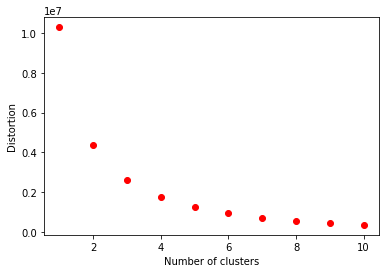

In [55]:
k_list = []
cost = []
for k in range(1, 11):
    kmeans_model = KMeans(n_clusters=k, random_state=1).fit(X)
    labels = kmeans_model.labels_
    inertia = kmeans_model.inertia_
    print('K:',k,'cost:', inertia)
    k_list.append(k)
    cost.append(inertia)
    

plt.plot(k_list, cost, 'ro')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

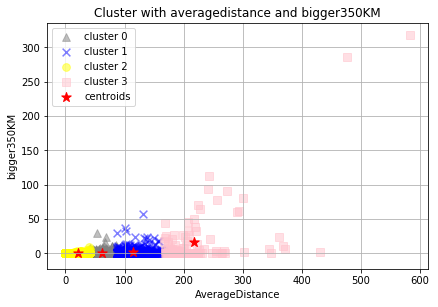

In [57]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
from sklearn.preprocessing import Imputer

feature = ['AverageDistance', 'bigger350KM']
X = np.array(df[feature])

n_clusters = 4
km = KMeans(n_clusters).fit(X)
km.labels_


colors = ['grey', 'blue', 'yellow', 'pink']
markers = ['^', 'x', 'o', 's']
for i in range(n_clusters):
    members = km.labels_ == i
    plt.scatter(X[members, 0], X[members, 1], s=60, marker = markers[i], c=colors[i], label='cluster %s'%i, alpha=0.5)

    
plt.scatter(km.cluster_centers_[:, 0],
            km.cluster_centers_[:, 1],
            s=100,
            marker='*',
            c='red',
            label='centroids')
plt.legend()
plt.grid()
plt.tight_layout()   
plt.title('Cluster with averagedistance and bigger350KM')
plt.xlabel('AverageDistance')
plt.ylabel('bigger350KM')
plt.show()